In [38]:
from IPython.core.debugger import set_trace

import os
import sys
import seaborn as sns

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder    #tranforma variables categoricas a numericas
from sklearn.preprocessing import StandardScaler  # Escala los datos
from sklearn.ensemble import IsolationForest      # Algoritmo de recorte
from sklearn.decomposition import PCA             # Reduccion de dimensionalidad
from sklearn.model_selection import train_test_split  # divide de manera aleatoria en sub conjuntos de datos de prueba y entrenamiento
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.metrics import confusion_matrix      # genera la matriz de confusion
from sklearn.preprocessing import LabelEncoder    #tranforma variables categoricas a numericas
from sklearn.preprocessing import StandardScaler  # Escala los datos
import pickle
from numpy import linalg as LA

import statsmodels.api as sm
from sklearn.metrics import classification_report

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)

In [39]:
pwd

'C:\\Users\\josrenca\\Desktop\\Universidad\\ARI-PI1-US-CarAccidentsAnalysis\\NoteBooks\\5. Modelos'

In [40]:
path = 'C:\\Users\\josrenca\\Desktop\\Universidad\\Datos PI - ARI\\'
archivo = 'cleanedVariables-standarized-respuestaBinaria.pkl'
rutaArvhivo = path + archivo
df = pd.read_pickle(rutaArvhivo)

In [41]:
df.shape

(3027853, 36)

In [42]:
df.columns

Index(['Amenity', 'Astronomical_Twilight', 'Bump', 'City', 'Civil_Twilight',
       'County', 'Crossing', 'Give_Way', 'Hour', 'Junction',
       'Nautical_Twilight', 'No_Exit', 'Railway', 'Roundabout', 'Severity',
       'Start_Lat', 'Start_Lng', 'State', 'Station', 'Stop', 'Street',
       'Sunrise_Sunset', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Weather_Condition', 'Wind_Direction', 'dayOfWeek', 'month',
       'newSeverity', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)', 'Description'],
      dtype='object')

In [43]:
y1=df['Severity']
y2=df['newSeverity']

In [44]:
X = df[df.columns.difference(['Description', 'Severity', 'newSeverity'])]

In [45]:
# Mostrand listado final de variables predictoras
X.columns

Index(['Amenity', 'Astronomical_Twilight', 'Bump', 'City', 'Civil_Twilight',
       'County', 'Crossing', 'Give_Way', 'Hour', 'Humidity(%)', 'Junction',
       'Nautical_Twilight', 'No_Exit', 'Pressure(in)', 'Railway', 'Roundabout',
       'Start_Lat', 'Start_Lng', 'State', 'Station', 'Stop', 'Street',
       'Sunrise_Sunset', 'Temperature(F)', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Visibility(mi)', 'Weather_Condition', 'Wind_Direction',
       'Wind_Speed(mph)', 'dayOfWeek', 'month'],
      dtype='object')

# PCA

In [46]:
numComp = X.shape[1]
numComp

33

In [47]:
%%time
pca = PCA(n_components=numComp)
principalComponents = pca.fit_transform(X)

Wall time: 13 s


In [48]:
columns = []
for i in range(1, numComp+1):
    columns.append("PC" + str(i))

In [49]:
principalDf = pd.DataFrame(data = principalComponents, columns = columns)

In [50]:
principalDf

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33
0,-53513.356555,5657.678916,714.892099,32.136627,12.415160,2.555412,-2.624287,6.679212,-1.037164,4.294069,...,0.024441,0.333598,-0.017555,0.023501,-0.006530,-0.000827,-0.000048,-0.000144,-0.000081,-4.307617e-13
1,3696.824517,-3074.277140,-217.232489,31.712166,11.405099,3.529207,-2.706586,6.589221,0.414711,4.224529,...,-0.015193,-0.189991,-0.004301,-0.003852,-0.001905,-0.000285,-0.000230,-0.000079,-0.000082,-1.406934e-12
2,-10636.173628,-3067.679987,-220.196033,31.138624,10.694989,3.396502,-2.671732,6.549568,0.452535,4.273427,...,0.026239,0.006805,-0.018917,0.020650,-0.005733,0.000208,0.000314,-0.000171,-0.000029,-6.499336e-14
3,-70733.365644,5535.512399,479.837460,9.553011,15.638272,1.550957,-2.165722,6.026566,0.615244,4.422409,...,-0.019248,0.008022,-0.003018,0.000002,-0.002751,-0.000808,-0.000498,-0.000081,-0.000077,3.639643e-12
4,-19656.172574,-3063.529154,-222.051758,33.808380,9.730481,3.460336,-8.498991,7.376717,-0.267387,4.185571,...,-0.014026,0.008214,-0.007174,-0.004429,-0.002239,-0.000106,-0.000226,-0.000089,-0.000061,-1.333972e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3027848,-31499.298332,3131.433509,-318.906400,-32.485912,-23.026071,-2.141960,-7.754118,-4.834386,-1.075854,-1.423424,...,-0.022321,-0.000177,0.006372,0.000305,0.000345,-0.000882,-0.000261,0.000160,0.000027,6.028794e-15
3027849,3675.877808,3486.584693,-359.107798,-30.754039,-20.573412,-2.263989,-3.816235,-6.517816,-1.673821,-1.397842,...,-0.020170,0.002126,0.005364,-0.002057,-0.000293,-0.000341,-0.000344,0.000083,0.000013,3.116488e-15
3027850,13946.163961,2017.823060,-180.301111,34.884685,-29.781570,-0.911821,-2.222952,-6.306266,-0.474998,-1.497763,...,-0.000635,-0.000458,0.003926,-0.002739,-0.000414,-0.000957,-0.000460,0.000086,-0.000493,4.302291e-15
3027851,-47023.242311,-3160.360223,-93.862085,-36.611351,-30.197338,-0.772624,-3.897191,-5.867796,0.899067,-1.261642,...,-0.016766,0.002172,0.004432,-0.008711,-0.000334,-0.000441,-0.000360,0.000147,0.000009,1.123128e-15


In [51]:
# Percentage of variance explained by each of the selected components.
explainedVar = pca.explained_variance_ratio_
explainedVar

array([9.92938252e-01, 6.93845680e-03, 1.22091944e-04, 7.89604800e-07,
       2.29332442e-07, 1.06338578e-07, 2.99862875e-08, 1.64554747e-08,
       1.45696218e-08, 7.92631344e-09, 1.96090636e-09, 9.33362266e-10,
       6.33861195e-10, 5.98751416e-10, 4.90100764e-10, 3.15779149e-10,
       2.36972853e-10, 1.11920284e-10, 4.71090155e-11, 3.84727502e-11,
       3.37787468e-11, 1.33678041e-11, 1.31106779e-11, 9.44099017e-12,
       8.39322909e-12, 7.13024636e-12, 5.20957805e-12, 1.73761228e-12,
       8.36904110e-13, 3.23014702e-13, 5.12330701e-14, 3.46896543e-14,
       9.90700660e-33])

In [52]:
acumulated = []
iteracion = 1
running = True
actual = 0
while(running==True):
    for i in range(0, iteracion):
        actual += explainedVar[i]
    if iteracion == numComp:
        running = False
    else: 
        acumulated.append(actual)
        actual = 0
        iteracion +=1

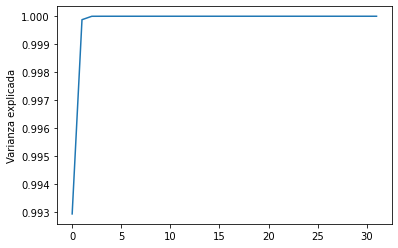

In [53]:
plt.plot(acumulated)
plt.ylabel('Varianza explicada')
plt.show()

In [54]:
columns = []
for i in range(1, 3):
    columns.append("PC" + str(i))
print(columns)

['PC1', 'PC2']


In [55]:
X = principalDf[columns]
X.head()

,PC1,PC2
0,-53513.356555,5657.678916
1,3696.824517,-3074.277140
2,-10636.173628,-3067.679987
3,-70733.365644,5535.512399
4,-19656.172574,-3063.529154


# Modelo con Outliers

In [56]:
print('<<<Modelo 1>>>')
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size = 0.20, random_state = 5)
print(X_train1.shape)
print(X_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

print('\n<<<Modelo 2>>>')
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size = 0.20, random_state = 5)
print(X_train2.shape)
print(X_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

<<<Modelo 1>>>
(2422282, 2)
(605571, 2)
(2422282,)
(605571,)

<<<Modelo 2>>>
(2422282, 2)
(605571, 2)
(2422282,)
(605571,)


https://stackoverflow.com/questions/20894671/speeding-up-sklearn-logistic-regression

## Modelo de regresion con variable Severity

In [57]:
%%time
model1 = LogisticRegression(max_iter=10000).fit(X_train1, y_train1)

Wall time: 13 s


In [58]:
archivoModelo = "model-LR-" + str(0) + "p-Severity.pkl"
rutaArchivo = path + "ModeloRLBinariaPCA\\" + archivoModelo  
modelfile = open(rutaArchivo, "wb")
pickle.dump(model1, modelfile)
modelfile.close()

In [59]:
predTest1 = model1.predict(X_test1)
predTrain1 = model1.predict(X_train1)

In [60]:
#Accuracy statistics
print('<<<Modelo 1>>>')
print('Accuracy Score Test:', metrics.accuracy_score(y_test1, predTest1))
print('Accuracy Score Train:', metrics.accuracy_score(y_train1, predTrain1))

<<<Modelo 1>>>
Accuracy Score Test: 0.6884510651930161
Accuracy Score Train: 0.6893511985805121


In [61]:
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test1, predTest1)
print(cf_matrix)

[[416906      0]
 [188665      0]]


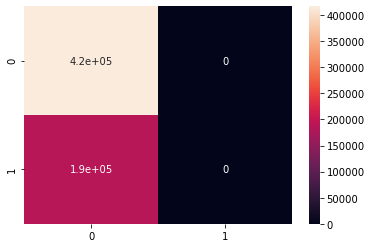

In [62]:
sns.heatmap(cf_matrix, annot=True)

In [63]:
#Get the confusion matrix
cf_matrix = confusion_matrix(y_train1, predTrain1)
print(cf_matrix)

[[1669803       0]
 [ 752479       0]]


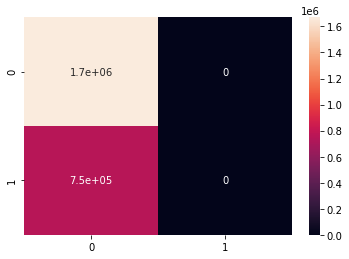

In [64]:
sns.heatmap(cf_matrix, annot=True)

In [65]:
print(classification_report(y_test1, predTest1))

C:\Users\josrenca\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.69      1.00      0.82    416906
           1       0.00      0.00      0.00    188665

    accuracy                           0.69    605571
   macro avg       0.34      0.50      0.41    605571
weighted avg       0.47      0.69      0.56    605571



In [66]:
print(classification_report(y_train1, predTrain1))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82   1669803
           1       0.00      0.00      0.00    752479

    accuracy                           0.69   2422282
   macro avg       0.34      0.50      0.41   2422282
weighted avg       0.48      0.69      0.56   2422282



# Modelo eliminando outliers

In [67]:
def obtainPCA(X,numComp):
    
    pca = PCA(n_components=X.shape[1])
    principalComponents = pca.fit_transform(X)
    
    print(principalComponents.shape)
    
    columns = []
    for i in range(1, X.shape[1]+1):
        columns.append("PC" + str(i))
    
    principalDf = pd.DataFrame(data = principalComponents, columns = columns)
    
    # Percentage of variance explained by each of the selected components.
    explainedVar = pca.explained_variance_ratio_
    explainedVar = explainedVar[0:2].sum()
    
    columns = []
    for i in range(1, numComp+1):
        columns.append("PC" + str(i))
        
    X = principalDf[columns]
    
    return X, explainedVar

In [68]:
import time

def simulaciónModelo(variableObjetivo, contInicial, rango, numModelos, splitTest):
    
    print("Preparando los datos...")
    numsCond = []
    tiemposRecorte = []
    nombreVariableObj = variableObjetivo
    contaminacionVec = []
    
    contaminacion = contInicial
    for i in range(1,numModelos+1):
        
        start_time = time.time()
        
        print("\n\n<<<<<<<<<<<<<<<<<<<<<<<<<<<<< Modelo: " + str(i) + " >>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
        

        path = 'C:\\Users\\josrenca\\Desktop\\Universidad\\Datos PI - ARI\\'
        archivo = "cleanedData-IF-" + str(contaminacion) + "p-" + nombreVariableObj +".pkl"
        rutaArchivo = path + "DatosRecorteIFBinaria\\" + archivo
        df = pd.read_pickle(rutaArchivo)
        
        y = df[variableObjetivo]
        X = df[df.columns.difference(['Description', 'Severity', 'newSeverity'])]
        
        print("Contaminacion: " + str(contaminacion))
        print("Ruta archivo de datos: " + rutaArchivo)
        print("Nombre archivo datos: " + archivo)
        
        print('<<<Split entranimiento y testing>>>')
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = splitTest, random_state = 5)
        print(X_train.shape)
        print(X_test.shape)
        print(y_train.shape)
        print(y_test.shape)
        
        X_train, explainedVar = obtainPCA(X_train,2)
        print("Varianza explicada train 2comp: " + str(explainedVar))
              
        X_test, explainedVar = obtainPCA(X_test,2)
        print("Varianza explicada test 2comp: " + str(explainedVar))
        
        print("\nAjustando modelo...")
        model = LogisticRegression(max_iter=10000).fit(X_train, y_train)
        
        
        archivoModelo = "model-LR-" + str(contaminacion) + "p-" + nombreVariableObj +".pkl"
        rutaArchivo = path + "ModeloRLBinariaPCA\\" + archivoModelo  
        modelfile = open(rutaArchivo, "wb")
        pickle.dump(model, modelfile)
        modelfile.close()
        
        print("\nRuta: " + rutaArchivo)
        print("Modelo guardado con nombre: " + archivoModelo)
        
        print("Prediciendo ...")
        predTest = model.predict(X_test)
        predTrain = model.predict(X_train)
        
        print("\nMetricas datos de prueba: ")
        print(classification_report(y_test, predTest))
        
        print("\nMetricas datos de entrenamiento: ")
        print(classification_report(y_train, predTrain))
        
        

        numCondActual = LA.cond(X_train)
        tiempoEjecucion = time.time() - start_time
        
        
        print("Numero condicion actual: " + str(numCondActual))
        print("-------- %s segundos --------" % (tiempoEjecucion))
        
        tiemposRecorte.append(tiempoEjecucion)
        numsCond.append(numCondActual)
        contaminacionVec.append(contaminacion)

        if i == 1 and contaminacion == 0.01:
            contaminacion = 0
        
        contaminacion=round(round(contaminacion,2)+round(rango,2),2)
        
    return contaminacionVec, tiemposRecorte, numsCond

In [69]:
%%time
contaminacionVec, tiemposRecorte, numsCond = simulaciónModelo("Severity", 0.1, 0.1, 4, 0.2)

Preparando los datos...


<<<<<<<<<<<<<<<<<<<<<<<<<<<<< Modelo: 1 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Contaminacion: 0.1
Ruta archivo de datos: C:\Users\josrenca\Desktop\Universidad\Datos PI - ARI\DatosRecorteIFBinaria\cleanedData-IF-0.1p-Severity.pkl
Nombre archivo datos: cleanedData-IF-0.1p-Severity.pkl
<<<Split entranimiento y testing>>>
(2180053, 33)
(545014, 33)
(2180053,)
(545014,)
(2180053, 33)
Varianza explicada train 2comp: 0.9998760298458265
(545014, 33)
Varianza explicada test 2comp: 0.999876108173157

Ajustando modelo...

Ruta: C:\Users\josrenca\Desktop\Universidad\Datos PI - ARI\ModeloRLBinariaPCA\model-LR-0.1p-Severity.pkl
Modelo guardado con nombre: model-LR-0.1p-Severity.pkl
Prediciendo ...

Metricas datos de prueba: 
              precision    recall  f1-score   support

           0       0.71      0.51      0.59    379463
           1       0.32      0.52      0.39    165551

    accuracy                           0.51    545014
   macro avg       0.51      0.52      0.49 

C:\Users\josrenca\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.70      1.00      0.82    297339
           1       0.00      0.00      0.00    126561

    accuracy                           0.70    423900
   macro avg       0.35      0.50      0.41    423900
weighted avg       0.49      0.70      0.58    423900


Metricas datos de entrenamiento: 
              precision    recall  f1-score   support

           0       0.70      1.00      0.82   1189278
           1       0.00      0.00      0.00    506319

    accuracy                           0.70   1695597
   macro avg       0.35      0.50      0.41   1695597
weighted avg       0.49      0.70      0.58   1695597

Numero condicion actual: 11.760989756894022
-------- 31.03270936012268 segundos --------


<<<<<<<<<<<<<<<<<<<<<<<<<<<<< Modelo: 4 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Contaminacion: 0.4
Ruta archivo de datos: C:\Users\josrenca\Desktop\Universidad\Datos PI - ARI\DatosRecorteIFBinaria\cleanedData-IF-0.4p-Severity.pkl


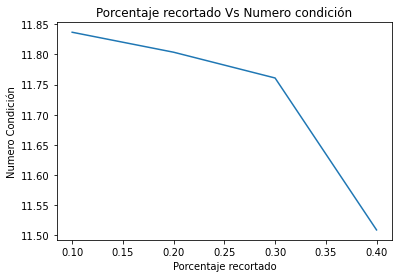

In [70]:
plt.title("Porcentaje recortado Vs Numero condición")
plt.ylabel("Numero Condición")
plt.xlabel("Porcentaje recortado")
plt.plot(contaminacionVec,numsCond)

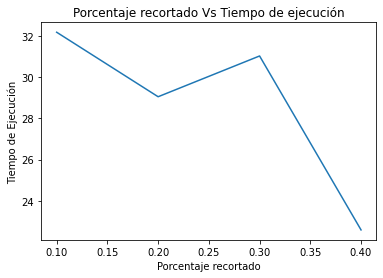

In [71]:
plt.title("Porcentaje recortado Vs Tiempo de ejecución")
plt.ylabel("Tiempo de Ejecución")
plt.xlabel("Porcentaje recortado")
plt.plot(contaminacionVec,tiemposRecorte)